<a href="https://colab.research.google.com/github/Nathanialc25/Python_practice/blob/main/Personal_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import pandas as pd
import numpy as np

#allows for imports from my local
from google.colab import files
uploaded = files.upload()

Saving Test Device-and-Platform-Jun-1-2020-Aug-31-2020.csv to Test Device-and-Platform-Jun-1-2020-Aug-31-2020.csv


#working with the device df


In [ ]:
device_df = pd.read_csv("Test Device-and-Platform-Jun-1-2020-Aug-31-2020.csv")

Creating a table with the breakdown of devices and some metrics


In [ ]:
#preprocessing, removing that summary row at the top of the dataframe
device_df = device_df[device_df['Day'].notna()]

In [ ]:
#Making the df smaller, with only pertinent attributes
device_short = device_df[["Impression Device",'Reach', 'Impressions','3-second video plays', 'ThruPlays',"CTR (all)",
       'Video plays at 25%', 'Video plays at 50%', 'Video plays at 75%',
       'Video plays at 95%', 'Video plays at 100%','Link clicks',
       'Unique link clicks']]

In [ ]:
device_short.head(3)

,Impression Device,Reach,Impressions,3-second video plays,ThruPlays,CTR (all),Video plays at 25%,Video plays at 50%,Video plays at 75%,Video plays at 95%,Video plays at 100%,Link clicks,Unique link clicks
1,iphone,39553,39803,2357.0,176.0,0.050247,1020.0,344.0,176.0,111.0,102.0,5.0,5.0
2,desktop,48,82,20.0,5.0,0.000000,9.0,6.0,5.0,1.0,1.0,NaN,NaN
3,android_smartphone,45524,48363,5773.0,686.0,0.926328,2654.0,1115.0,707.0,460.0,396.0,299.0,288.0


In [ ]:
#grouping by device type and looking at some metrics against it
device_short_table_df = device_short.groupby("Impression Device")[['Impressions','Reach','Link clicks']].sum()
device_short_table_df ['CTR'] = device_short_table_df ['Link clicks']/device_short_table_df ['Impressions']*100
device_short_table_df

,Impressions,Reach,Link clicks,CTR
Impression Device,,,,
android_smartphone,2726011,2422417,24156.0,0.886130
android_tablet,152233,139223,1414.0,0.928839
desktop,3243,2805,28.0,0.863398
ipad,52383,48915,570.0,1.088139
iphone,1671020,1644121,2630.0,0.157389
ipod,588,236,3.0,0.510204
other,43105,40069,412.0,0.955806


most of the users are beign reached at either their iphone or android smart phone.
Though iphone is the second most targeted, its CTR is the worst, less people (percentage wise) are drawn to make an action on these ads

In [ ]:
device_short = device_short.groupby('Impression Device')[['Reach','Impressions','Video plays at 100%']].sum()
device_short



,Reach,Impressions,Video plays at 100%
Impression Device,,,
android_smartphone,2422417,2726011,29166.0
android_tablet,139223,152233,3235.0
desktop,2805,3243,187.0
ipad,48915,52383,2218.0
iphone,1644121,1671020,11004.0
ipod,236,588,12.0
other,40069,43105,978.0


#Working with the time DF

different metrics vs 24 hours, using barchart


In [ ]:
# importing time dataframe

from google.colab import files
uploaded = files.upload()

Saving time_short (1).csv to time_short (1).csv


In [ ]:
#reading the df in
time_df = pd.read_csv("Test-report-Time-of-day-Jun-1-2020-Aug-31-2020 (1).csv")
#preprocessing, removing that summary row at the top of the dataframe
time_df = time_df[time_df['Day'].notna()]

time_df.head(3)

,Campaign name,Ad set name,Day,Time of day (viewer's time zone),Delivery status,Delivery level,Reach,Impressions,Frequency,Result Type,Results,Amount spent (GBP),Cost per result,Starts,Ends,CPC (all),CTR (all),"CPM (cost per 1,000 impressions)",3-second video plays,ThruPlays,Video plays at 25%,Video plays at 50%,Video plays at 75%,Video plays at 95%,Video plays at 100%,Video average play time,Cost per 3-second video plays,Cost per ThruPlay,Link clicks,Unique link clicks,CPC (cost per link click),Landing page views,Reporting starts,Reporting ends
1,FB / IG mix,FB / IG mix,2020-08-31,22:00:00 - 22:59:59,not_delivering,adset,1,1,1.0,NaN,NaN,0.00,NaN,2020-07-09,2020-08-31,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-31,2020-08-31
2,IG Only,IG only,2020-08-31,04:00:00 - 04:59:59,not_delivering,adset,292,292,1.0,Reach,292.0,0.22,0.75,2020-07-30,2020-08-31,NaN,0.000000,0.753425,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010476,NaN,NaN,NaN,NaN,NaN,2020-08-31,2020-08-31
3,IG Only,IG only,2020-08-31,15:00:00 - 15:59:59,not_delivering,adset,2922,2922,1.0,Reach,2922.0,2.15,0.74,2020-07-30,2020-08-31,2.15,0.034223,0.735797,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010859,NaN,NaN,NaN,NaN,NaN,2020-08-31,2020-08-31


In [ ]:
#checking attributes
time_df.columns

Index(['Campaign name', 'Ad set name', 'Day',
       'Time of day (viewer's time zone)', 'Delivery status', 'Delivery level',
       'Reach', 'Impressions', 'Frequency', 'Result Type', 'Results',
       'Amount spent (GBP)', 'Cost per result', 'Starts', 'Ends', 'CPC (all)',
       'CTR (all)', 'CPM (cost per 1,000 impressions)', '3-second video plays',
       'ThruPlays', 'Video plays at 25%', 'Video plays at 50%',
       'Video plays at 75%', 'Video plays at 95%', 'Video plays at 100%',
       'Video average play time', 'Cost per 3-second video plays',
       'Cost per ThruPlay', 'Link clicks', 'Unique link clicks',
       'CPC (cost per link click)', 'Landing page views', 'Reporting starts',
       'Reporting ends'],
      dtype='object')

In [ ]:
#shortening the df to only relevant attributes
time_short = time_df[['Campaign name', 'Ad set name', 'Day', "Time of day (viewer's time zone)",'Reach', 'Impressions', 'Frequency',"CTR (all)", "Amount spent (GBP)", '3-second video plays', 'ThruPlays',
       'Video plays at 25%', 'Video plays at 50%', 'Video plays at 75%',
       'Video plays at 95%', 'Video plays at 100%','Link clicks',
       'Unique link clicks']]

In [ ]:
#changing the time of the day to 24 hours schema
time_short["Time of day (viewer's time zone)"] = time_short["Time of day (viewer's time zone)"].str.split(":", expand = True)[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Grouping by time of day, and summing a few metrics
time_short = time_short.groupby("Time of day (viewer's time zone)")["Impressions","Link clicks", "Amount spent (GBP)", "Reach"].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
#creating a few custom metrics
time_short["CTR"] = round(time_short['Link clicks']/time_short['Impressions'] * 100,2)
time_short["CPM"] = (time_short['Amount spent (GBP)']/time_short['Impressions']) * 1000
time_short["CPC"] = (time_short['Link clicks']/time_short['Amount spent (GBP)'])
time_short["Freq"] = (time_short['Impressions']/time_short['Reach'])
time_short["Clicks per user"] = (time_short['Link clicks']/time_short['Reach'])

In [ ]:
time_short.head(3)

,Impressions,Link clicks,Amount spent (GBP),Reach,CTR,CPM,CPC,Freq,Clicks per user
Time of day (viewer's time zone),,,,,,,,,
00,104308,436.0,163.87,103448,0.42,1.571020,2.660646,1.008313,0.004215
01,57212,241.0,92.57,56838,0.42,1.618017,2.603435,1.006580,0.004240
02,34839,142.0,55.64,34557,0.41,1.597061,2.552121,1.008160,0.004109


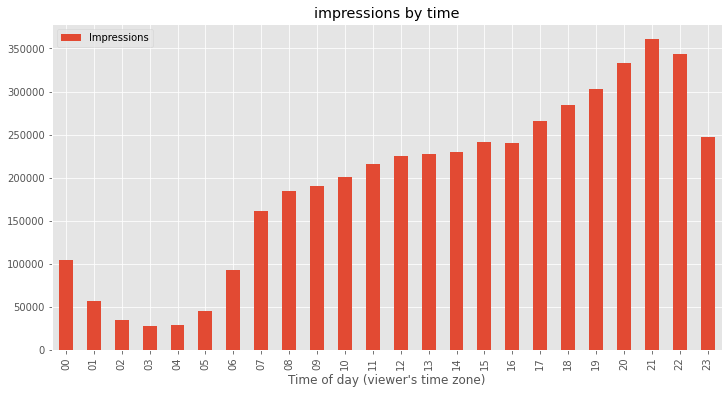

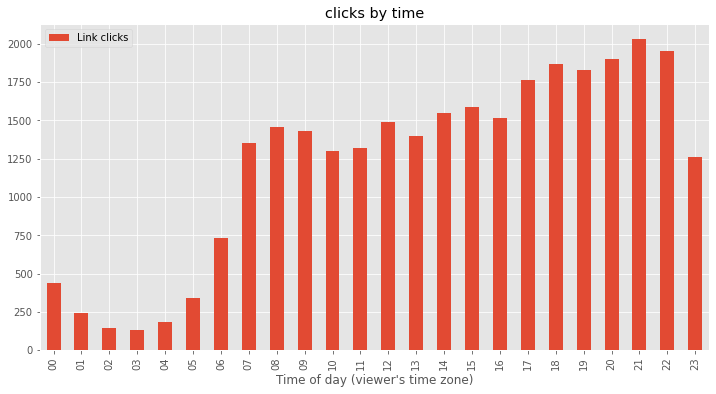

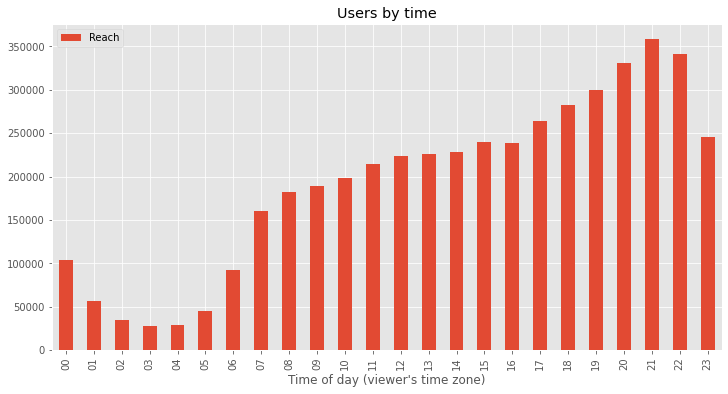

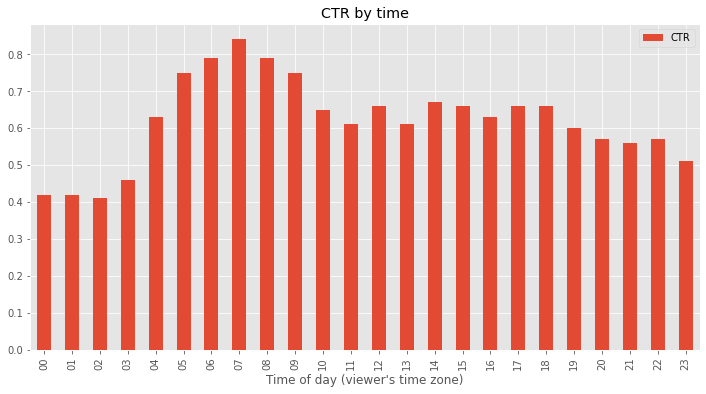

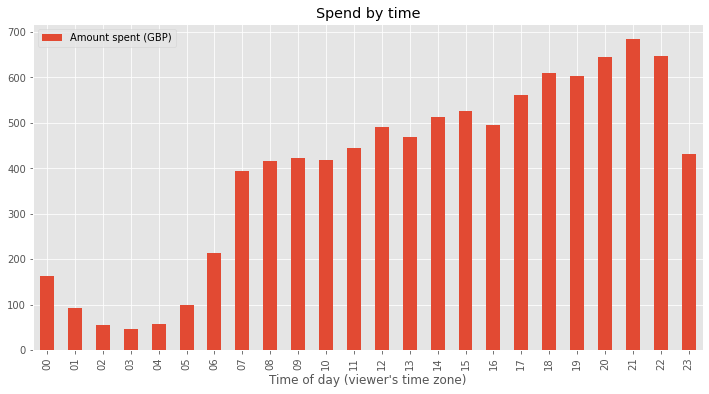

In [ ]:
#creating plots
time_short.plot.bar(
    y = "Impressions",
    title = 'impressions by time',
    figsize = (12,6)

)
plt.show()           

time_short.plot.bar(
    y = "Link clicks",
    title = 'clicks by time',
    figsize = (12,6)
)
plt.show()


time_short.plot.bar(
    y = "Reach",
    title = 'Users by time',
    figsize = (12,6)
)
plt.show()

time_short.plot.bar(
    y = "CTR",
    title = 'CTR by time',
    figsize = (12,6)
)
plt.show()

time_short.plot.bar(
    y = "Amount spent (GBP)",
    title = 'Spend by time',
    figsize = (12,6)
)
plt.show()



insights:

Impressions and users are basically 1 to 1...
meaning the frequency is super low.. 
This is resemblant of the upper parts of the funnel.. I would assume this is awareness campaigns (prospecting)..
The funnel then needs to start focusing on Retargeting

The windows of 6pm through 10 pm are the 5 best hours for impressions.

while the window of 1am through 5am are the worst hours for reaching users, and gaining impressions.. 
Even though thats the case, this group has small overlap with the optimum group for ctr 5am - 9am is the best time. 

If the tactic is just prospecting or awareness, I suppose CTR isnt the main KPI here. if we are looking to improve that interaction rate though, maybe serve more impression at 5am - 9 am

potentially shift spend to to the morning, so it can match the window where people have the highest ctr






#Time series of different metrics

In [ ]:
#grouping by Day, and summing other metrics
time_grouped_at_day = time_df.groupby("Day")["Impressions","Link clicks", "Amount spent (GBP)", "Reach"].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
#adding custom metrics
time_grouped_at_day["CTR"] = round(time_grouped_at_day['Link clicks']/time_grouped_at_day['Impressions'] * 100,2)
time_grouped_at_day["CPM"] = (time_grouped_at_day['Amount spent (GBP)']/time_grouped_at_day['Impressions']) * 1000
time_grouped_at_day["CPC"] = (time_grouped_at_day['Link clicks']/time_grouped_at_day['Amount spent (GBP)'])
time_grouped_at_day["Freq"] = (time_grouped_at_day['Impressions']/time_grouped_at_day['Reach'])

In [ ]:
#new df
time_grouped_at_day.head()

,Impressions,Link clicks,Amount spent (GBP),Reach,CTR,CPM,CPC,Freq
Day,,,,,,,,
2020-07-15,30492,429.0,109.45,30364,1.41,3.589466,3.919598,1.004216
2020-07-16,47854,675.0,194.05,47541,1.41,4.055042,3.478485,1.006584
2020-07-17,52228,724.0,205.28,51809,1.39,3.930459,3.526890,1.008087
2020-07-18,58043,704.0,195.97,57676,1.21,3.376290,3.592387,1.006363
2020-07-19,59124,759.0,199.51,58653,1.28,3.374433,3.804321,1.008030


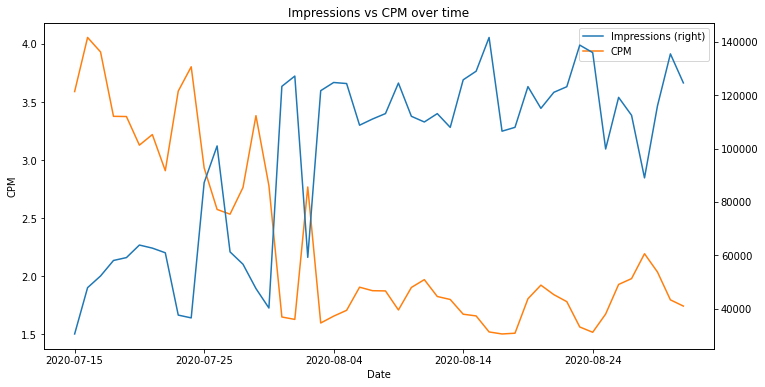

In [ ]:
#impressions vs CPM
time_grouped_at_day.plot(
    y=["Impressions", "CPM"],
    secondary_y = 'Impressions',
    figsize=(12, 6) ,
    ylabel = 'CPM',
    xlabel = 'Date',
    use_index = True,
    title = 'Impressions vs CPM over time'
    # xticks([0, 1, 2],
                         )
plt.show()

Insights:
impressions defintely have increased over time on average - this is a positive
CPM is decreasing as well. meaning you all are reaching more people for less money which is an effective technique.. Though youre reaching more for less, again this is ideal for an awareness technique, 

lets check and see if this is helping with ctr

these all could be useful to help figuring out ROI

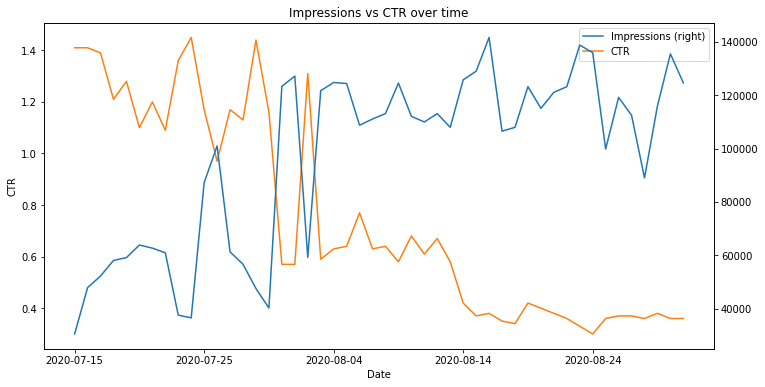

In [ ]:
#impressions vs CPM
time_grouped_at_day.plot(
    y=["Impressions", "CTR"],
    secondary_y = 'Impressions',
    figsize=(12, 6) ,
    ylabel = 'CTR',
    xlabel = 'Date',
    use_index = True,
    title = 'Impressions vs CTR over time'
    # xticks([0, 1, 2],
                         )
plt.show()

following off the last one,
yes we cn see that even though impressions are going up,
the interaction % is decreasing. CTR is plummiting.

Must find a way to get CTR up- if these are anything besides awareness

useful for ROI

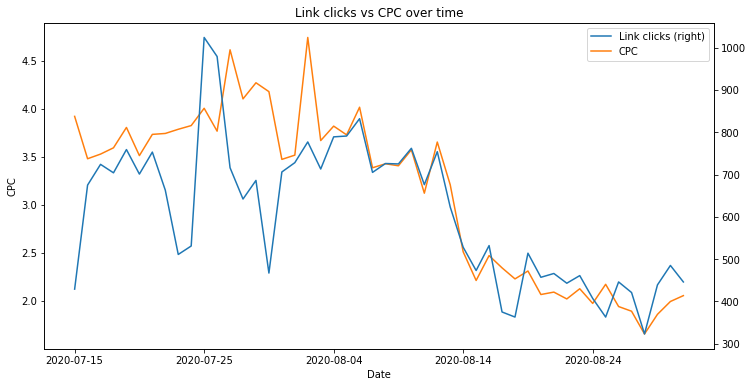

In [ ]:
#clicks vs cpc
time_grouped_at_day.plot(
    y=["Link clicks", "CPC"],
    secondary_y = 'Link clicks',
    figsize=(12, 6) ,
    ylabel = 'CPC',
    xlabel = 'Date',
    use_index = True,
    title = 'Link clicks vs CPC over time'
                         )
plt.show()

Link clicks as well as cpc is going down..

cpc decreasing tends to always be a positive becuase youre saving money, but it looks to be going hand and hand with decreased interaction 

CPC is importnt to help understand ROI

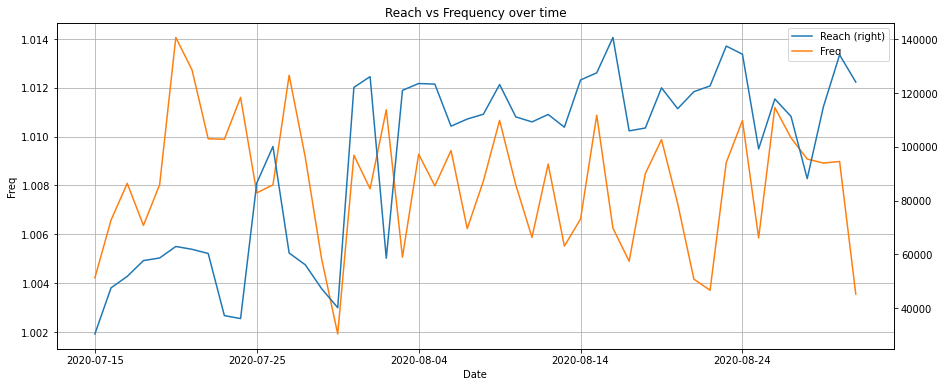

In [ ]:
#Reach and Frequency
time_grouped_at_day.plot(
    y=["Reach", "Freq"],
    secondary_y = 'Reach',
    figsize=(15, 6) ,
    ylabel = 'Freq',
    xlabel = 'Date',
    use_index = True,
    grid = True,
    title = 'Reach vs Frequency over time'
                         )
plt.show()

Unique User reach has shown a growth from August to September,
Though the Frequency appears to have jumped around greatly, it has actually only fluctuated .01% over these months, which is almost negligable.

Frequency seems very low... 

In [ ]:
#instead of over arching, lets look at the days of the week

In [ ]:
#sep 15th was the first day, so ill just go from there
days_of_week = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

#gender df


In [ ]:
#importing dataframe
from google.colab import files
uploaded = files.upload()
import matplotlib.pyplot as plt


Saving Research Paper 667.docx to Research Paper 667.docx


In [ ]:
#aliasing dataframe
gender_df = pd.read_csv("Test Genderaage-report-Jun-1-2020-Aug-31-2020.csv")

In [ ]:
#checking the columns available
gender_df.columns

Index(['Campaign name', 'Ad set name', 'Day', 'Age', 'Gender',
       'Delivery status', 'Delivery level', 'Reach', 'Impressions',
       'Frequency', 'Result Type', 'Results', 'Amount spent (GBP)',
       'Cost per result', 'Starts', 'Ends', 'CPC (all)', 'CTR (all)',
       'CPM (cost per 1,000 impressions)', '3-second video plays', 'ThruPlays',
       'Video plays at 25%', 'Video plays at 50%', 'Video plays at 75%',
       'Video plays at 95%', 'Video plays at 100%', 'Video average play time',
       'Cost per 3-second video plays', 'Cost per ThruPlay', 'Link clicks',
       'Unique link clicks', 'CPC (cost per link click)', 'Landing page views',
       'Reporting starts', 'Reporting ends'],
      dtype='object')

In [ ]:
#shortening the df to only necessary fields
gender_short = gender_df[['Campaign name', 'Ad set name', 'Day', "Age", "Gender",'Reach', 'Impressions', 'Frequency','CPC (all)', 'CTR (all)',
       'CPM (cost per 1,000 impressions)','Amount spent (GBP)', '3-second video plays', 'ThruPlays',
       'Video plays at 25%', 'Video plays at 50%', 'Video plays at 75%',
       'Video plays at 95%', 'Video plays at 100%', 'Video average play time', 'Link clicks',
       'Unique link clicks']]

In [ ]:
gender_short.head()

,Campaign name,Ad set name,Day,Age,Gender,Reach,Impressions,Frequency,CPC (all),CTR (all),"CPM (cost per 1,000 impressions)",Amount spent (GBP),3-second video plays,ThruPlays,Video plays at 25%,Video plays at 50%,Video plays at 75%,Video plays at 95%,Video plays at 100%,Video average play time,Link clicks,Unique link clicks
0,NaN,NaN,NaN,NaN,NaN,1642241,4648583,2.830634,0.221558,0.922303,2.043431,9499.06,610464.0,77076.0,298683.0,129249.0,80470.0,53330.0,46800.0,2.0,29213.0,21000.0
1,FB / IG mix,FB / IG mix,2020-08-31,18-24,unknown,8,8,1.000000,NaN,0.000000,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,IG Only,IG only,2020-08-31,35-44,unknown,190,190,1.000000,NaN,0.000000,0.684211,0.13,18.0,3.0,8.0,3.0,3.0,2.0,2.0,1.0,NaN,NaN
3,FB / IG mix,FB / IG mix,2020-08-31,65+,female,17249,17914,1.038553,0.253581,1.278330,3.241599,58.07,3486.0,441.0,1648.0,726.0,454.0,292.0,253.0,2.0,143.0,135.0
4,FB / IG mix,FB / IG mix,2020-08-31,55-64,female,11585,12732,1.099007,0.268413,0.989632,2.656299,33.82,1820.0,235.0,831.0,373.0,247.0,166.0,140.0,2.0,85.0,83.0


creating plots to show the groups vs some interesting metrics

In [ ]:
#removing the aggregate row and other NAs
gender_df = gender_df[gender_df['Day'].notna()]

In [ ]:
# making a smaller dataframe to work with
gender_sub_df = gender_df[["Age","Gender",'Amount spent (GBP)','Impressions','Link clicks', 'Reach']]

#adding a new field to get unique groups
gender_sub_df['Unique group'] = gender_sub_df['Age'] + '_' + gender_sub_df['Gender']
    
#grouping by the unique groups
gender_grouped = gender_sub_df.groupby("Unique group").sum()

gender_grouped["CTR"] = gender_grouped["Link clicks"]/gender_grouped["Impressions"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


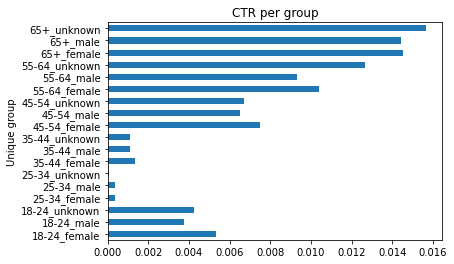

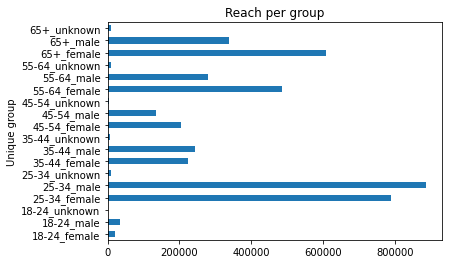

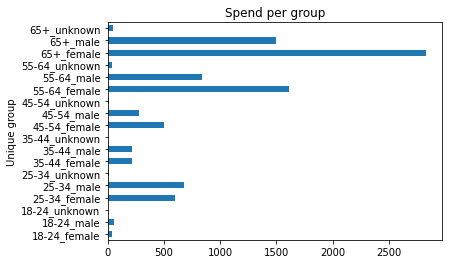

In [ ]:
#creating plots to get some side by side comparisons

(gender_grouped["CTR"]).plot(
    kind = 'barh',
    title = 'CTR per group'

)
plt.show()


gender_grouped['Reach'].plot(
    kind = 'barh',
    title = 'Reach per group'
)

plt.show()

gender_grouped['Amount spent (GBP)'].plot(
    kind = 'barh',
    title = 'Spend per group'
)

insights:

ctr - group age 65+ is the group that is converting at the highest percentage, immediately followed by 55-64, 25-34 have the worst CTR

reach -  25-34 males are the biggest group of users reached, followed by 25-34 women. The next closest group would be the 65+

Spend - most spend is spent onf 65+ woman

over all thoughts-
alot of spend is being placed on woman 65+.. roughly 89% more spend is being allocated to them over men 65+. and this only translates to a positive difference of about .1% change in CTR. potentially realocate some of the budget to the 65+ men.


This older audience seems to be more receptive and engaging with the videos. 

Maybe target younger people to get awareness up,
then target older people if we are looking to drive conversions.

video analysis

In [ ]:
gender_df = gender_df[gender_df['Link clicks'].notna()]

In [ ]:
gender_video = gender_df[[ "Age", "Gender",
       'Amount spent (GBP)', '3-second video plays', 'ThruPlays',
       'Video plays at 25%', 'Video plays at 50%', 'Video plays at 75%',
       'Video plays at 95%', 'Video plays at 100%',  'Link clicks',
       'Unique link clicks']]

#adding a new field to get unique groups
gender_video['Unique group'] = gender_video['Age'] + '_' + gender_video['Gender']
    
#grouping by the unique groups
gender_video_grouped = gender_video.groupby("Unique group").sum()

In [ ]:
gender_video_grouped.to_csv('gender_video_grouped.csv')
!cp gender_video_grouped.csv "drive/My Drive/"


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gender_video_grouped.csv to gender_video_grouped (1).csv


In [ ]:
gender_video_grouped = pd.read_csv('gender_video_grouped (1).csv')

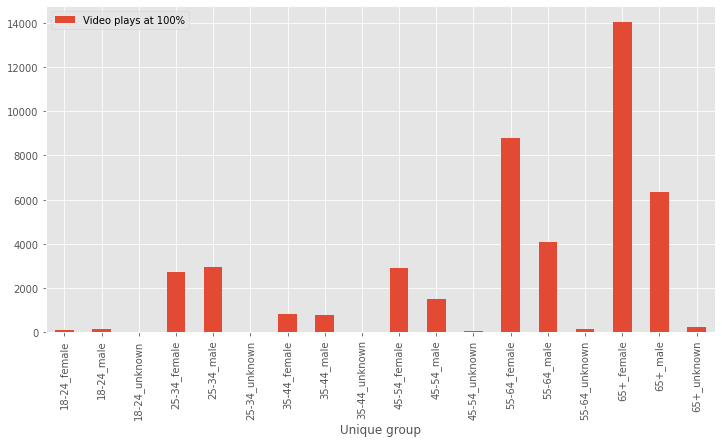

In [ ]:
#seeing the group that finishes the videos the most
gender_video_grouped[['Video plays at 100%','Unique group']].plot(
    x = 'Unique group',
    kind = 'bar',
    figsize = (12,6)
)

insights:
65 year old females are finishing videos at nearly 60% greater than the next highest group of 55 year old woman.


larger insight- 65 year old woman have high ctrs, have high finishing rate

If i had total user who watched the video I could show a retention curve, or even a percentage of users that are finishing

The ones who are finishing the least are those who are unknown, besides them it looks like 18-24 year olds arent finishing at all

potentially change where these videos are being placed, or target a different demographic entirely unless the younger people are needed